<a href="https://colab.research.google.com/github/Ppangchon/project/blob/main/traincode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
!pip install opencv-python
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras import backend as K
K.image_data_format()
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,Adam
import glob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive # เชื่อม drive ของเรา Mounted at /content/drive เชื่อมสำเร็จ
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os # os จัดการเกี่ยวกับไฟล์ต่างๆ ในโฟล์เดอร์
path = '/content/drive/My Drive/trycode'  # data เราอยู่โฟล์เดอร์ไหน

In [4]:
train ="/content/drive/My Drive/trycode/train"
test ="/content/drive/My Drive/trycode/test"
validation ="/content/drive/My Drive/trycode/val"

In [7]:
main_dir = os.listdir('/content/drive/My Drive/trycode/')
print(main_dir)

for i in main_dir:
    data_dir_list =  os.listdir('/content/drive/My Drive/trycode/'+ str(i) )
    print(i, data_dir_list)

['train', 'test', 'val']
train ['CSC', 'PCV', 'VKH', 'NORMAL']
test ['CSC', 'PCV', 'NORMAL', 'VKH']
val ['CSC', 'PCV', 'NORMAL', 'VKH']


In [8]:
no_images = 0
for i in main_dir:
    data_dir_list =  os.listdir('/content/drive/My Drive/trycode/'+ str(i) )
    print(i, data_dir_list)
    for dataset in data_dir_list:
        img_list = os.listdir( '/content/drive/My Drive/trycode/'+str(i)+ '/' + dataset)
        no_images = no_images+len(img_list)
print(no_images)

train ['CSC', 'PCV', 'VKH', 'NORMAL']
test ['CSC', 'PCV', 'NORMAL', 'VKH']
val ['CSC', 'PCV', 'NORMAL', 'VKH']
160


In [9]:
# กำหนดจำนวนคลาส
labels = np.ones((no_images,),dtype='int64')
label_index=0

In [10]:
len(labels)

160

In [11]:
img_data_list=[]
img=0

for i in main_dir:
    data_dir_list =  os.listdir('/content/drive/My Drive/trycode/'+ str(i) )
    print(i, data_dir_list)
    
    for dataset in data_dir_list:
        img_list = os.listdir( '/content/drive/My Drive/trycode/'+str(i)+ '/' + dataset)
        print ('Loading the images of dataset-'+'{}\n'.format(dataset))
        
        for img in img_list:
            input_img=cv2.imread('/content/drive/My Drive/trycode/' + str(i)+ '/'+ dataset + '/'+ img)
            
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize=cv2.resize(input_img,(256,256))
            
            img_data_list.append(input_img_resize)
            
            if dataset==  'VKH':
                labels[label_index]=  0
                
            if dataset == 'PCV':
                labels[label_index] = 1
                
            if dataset == 'NORMAL':
                labels[label_index] = 2
                
            if dataset == 'CSC':
                labels[label_index] = 3
                
            label_index = label_index+1

train ['CSC', 'PCV', 'VKH', 'NORMAL']
Loading the images of dataset-CSC

Loading the images of dataset-PCV

Loading the images of dataset-VKH

Loading the images of dataset-NORMAL

test ['CSC', 'PCV', 'NORMAL', 'VKH']
Loading the images of dataset-CSC

Loading the images of dataset-PCV

Loading the images of dataset-NORMAL

Loading the images of dataset-VKH

val ['CSC', 'PCV', 'NORMAL', 'VKH']
Loading the images of dataset-CSC

Loading the images of dataset-PCV

Loading the images of dataset-NORMAL

Loading the images of dataset-VKH



In [12]:
import gc

In [13]:
len(img_data_list)

160

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


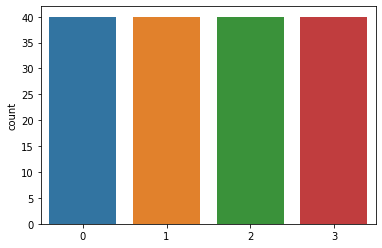

In [14]:
import seaborn as sns
sns.countplot(labels);
plt.show()

In [15]:
img_data_list = np.array(img_data_list)
img_data_list = img_data_list.astype('float32')
img_data_list /= 255
print (img_data_list.shape)

(160, 256, 256)


In [16]:
num_channel=1
if num_channel==1:
    if K.image_data_format()=='th':
        img_data_list= np.expand_dims(img_data_list, axis=1)
        print (img_data_list.shape)
    else:
        img_data_list= np.expand_dims(img_data_list, axis=3)
        print (img_data_list.shape)

else:
    if K.image_data_format()=='th':
        img_data_list = np.rollaxis(img_data_list,3,1)
        print (img_data_list.shape)

(160, 256, 256, 1)


In [17]:
# กำหนดจำนวนคลาส
num_classes = 4

names = ['CSC','PCV','NORMAL', 'VKH']

# แปลงเป็น one-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [18]:
# Split the dataset with 20% testing data
X_train, X_test, y_train, y_test = train_test_split(img_data_list, Y ,test_size=0.20) #, random_state = 2

In [19]:
del img_data_list

In [20]:
gc.collect()

2457

In [21]:
model = Sequential()

model.add(Convolution2D(32, (3,3), activation = 'relu',   padding = 'same',input_shape = (256,256,1)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Convolution2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Convolution2D(128, (3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Convolution2D(256, (3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Convolution2D(512, (3,2), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

# model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [22]:
learning_rate = 0.0001
opt = Adam(lr = learning_rate) 
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'] )

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
hist = model.fit(X_train, y_train, batch_size = 100, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10
2/2 [==============================] - 23s 2s/step - loss: 1.3795 - accuracy: 0.3137 - val_loss: 1.3682 - val_accuracy: 0.4615
Epoch 2/10
2/2 [==============================] - 20s 2s/step - loss: 1.3622 - accuracy: 0.5098 - val_loss: 1.3529 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 20s 2s/step - loss: 1.3435 - accuracy: 0.5196 - val_loss: 1.3309 - val_accuracy: 0.3846
Epoch 4/10
2/2 [==============================] - 21s 2s/step - loss: 1.3221 - accuracy: 0.4314 - val_loss: 1.3094 - val_accuracy: 0.4615
Epoch 5/10
2/2 [==============================] - 21s 2s/step - loss: 1.2982 - accuracy: 0.4412 - val_loss: 1.2901 - val_accuracy: 0.2692
Epoch 6/10
2/2 [==============================] - 21s 2s/step - loss: 1.2654 - accuracy: 0.3725 - val_loss: 1.2515 - val_accuracy: 0.2692
Epoch 7/10
2/2 [==============================] - 20s 2s/step - loss: 1.2246 - accuracy: 0.3725 - val_loss: 1.1818 - val_accuracy: 0.5385
Epoch 8/10
2/2 [==================

In [25]:
# Evaluate the model w.r.t Test Loss and Test Accuracy
score = model.evaluate(X_test, y_test)
print('Test Loss:', score[0])

print('Test accuracy:', score[1])

1/1 [==============================] - 2s 2s/step - loss: 1.2445 - accuracy: 0.5938
Test Loss: 1.2444913387298584
Test accuracy: 0.59375
